# COGS 108 - Final Project 

# Overview

At first I wanted to investigate the relationship between health inspection scores and food related illnesses in North Carolina. After reviewing the given data sets, I noticed that no specific cases of food related illnesses were included and decided to look at the potential relationship between health inspection scores and critical vs. non-critical violations. By combining the given data sets (inspections.csv, and violations.csv) to make graphical observations I was able to conclude a positive correlation between these two variables, in that violations that are considered more critical do impact health inspection scores significantly, which could evidentely lead to  more foodborne illnesses. 

# Name & GitHub

- Name: Xyana Dewindt
- GitHub Username: XyanaDewindt

# Research Question

Is there a correlation between health inspection scores and the criticality of the violations in North Carolina?

## Background and Prior Work

This question was sparked by my curiosity in finding out information in regards to health inspections within different areas of our country and to see whether or not there is a relationship between inspection scores and the violations received. Based on the given data sets, I am able to analyze this relationship within the state of North Carolina.

North Carolina requires a health inspection to be administered at random at least once a year, and can require more frequent visits based on the score and possible violations received. These health inspections are administered in order to let the public know how clean the business is and how likely the potential violations found will make one sick. Just like in many other states, the scoring is based on a letter grade, where A is equal to a score of 90 or above, B is in the 80's, and C is a score in the 70's. According to the North Carolina law, if a business is given a score of 69 or below, the business will have to close.(1)

There are a certain amount of categories the inspectors asses and give point values to based on how the business is doing in that category. The point values given, which essentially determine the letter grade the businneses receive, are based on the risk of spreading foodborne ilnesses. Some of the categories that cause for the largest point deductions include food temperature and handling issues.(2)

In comparison to other states and especially counties like San Diego, where I reside, Wake County, a major county in North Carolina, inspections seem a bit stricter and thus businesses are looked down upon when their score is below a 90. The health inspections are meant to help/educate business owners and their employees so they are given a second chance if their score is below a 90 initially.(1)

In 2015, Wake County conducted a risk factor study in which 447 food extablishments were randomly selected to be evaluated and observed in relation to risks of foodborne illnesses. The main purpose of this study was to compare results with a similar study conducted in 2010 and hopefully see improvement, which there was if you take a look at their data and conclusion. This study contains helpful information in regards to my research question as I can use their findings and make my own connections on the relationship between health inspections scores and the criticallity of the violations the businesses received.(3)

References (include links):
- 1) https://www.wral.com/yuck-or-yum-inspection-grades-keep-restaurants-diners-safe/16548733/
- 2) https://www.bizjournals.com/triangle/news/2015/09/23/wake-county-restaurants-critical-health-code.html
- 3) http://www.wakegov.com/food/healthinspections/Pages/fda_report.aspx

# Hypothesis


Food related businesses in North Carolina who receive a higher health inspection score are less likely to have received very critical violations and are thus less likely to cause foodborne illnesses. This is due to the fact that these health inspections are administered in order to let the public know how clean the business is and how likely the potential violations found will make one sick. The score received is based on the categories the businnesses violated during their inspection.  

# Dataset(s)


- Dataset Name: Inspections 
- Link to dataset: Provided by instructor 
- Number of observations: 18466
- Description: This dataset includes records of health inspections administered in various food related businesses from anywhere between 2012 and 2016. Some categories included in this dataset are the restaurant which was inspected, location, name of inspector, inspection score and more. 
- Features used: The only features that I will use to discuss my research question include: 'hsisid', 'city', 'score', and 'num_critical'.



- Dataset Name: Violations
- Link to dataset: Provided by instructor
- Number of observations: 189802
- Description: This dataset provides recorded violations present during health inspections in food related businesses in North Carolina. Each observation contains the date of inspection, the violation category, violation code, a short description, who it was inspected by, risk factor and more. 
- Features used: The only features that I will use to discuss my research question include: 'hsisid', 'critical', 'comments', and 'category'.


I will merge these two datasets using the 'hsisid' variable, which is an ID assigned to each restaurant in these two datasets. 


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import patsy
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import ttest_ind, normaltest

In [2]:
#Read in the csv files

df_inspections = pd.read_csv('inspections.csv')
df_violations = pd.read_csv('violations.csv')

# Data Cleaning

#### Cleaning inspections data

- I was mainly interested in keeping the 'hsisid', 'date' 'city', 'score', and 'num_critical' columns so I decided to begin by removing the other unwanted data.
    - I wanted to keep the 'hisid' column in order to merge the two data sets.
    - I'm going to use the 'date' column to remove all old inspections scores and keep the most up to date ones. 
    - Lastly, the 'score' column is necessary to to be able to draw a conclusion later on. 

In [3]:
#Remove unwanted data

df_inspections = df_inspections.drop([ 'city', 'name', 'address1', 
                                      'address2', 'state', 'postalcode', 
                                      'phonenumber', 'restaurantopendate', 
                                      'days_from_open_date', 'facilitytype', 
                                      'x', 'y', 'geocodestatus', 'zip', 'type', 
                                      'description', 'inspectedby','inspection_num', 
                                      'inspector_id', 'previous_inspection_date', 
                                      'days_since_previous_inspection', 'previous_inspection_by_same_inspector', 
                                      'num_non_critical', 'num_critical_previous', 'num_non_critical_previous',
                                      'num_critical_mean_previous', 'num_non_critical_mean_previous', 
                                      'avg_neighbor_num_critical', 'avg_neighbor_num_non_critical', 
                                      'top_match', 'second_match', 'critical'], axis = 1)

- Then I removed duplicate inspections and just saved the most recent inspection for each business.

In [4]:
#Remove old inspection scores

df_inspections = df_inspections.sort_values(['date']).drop_duplicates(subset = 'hsisid', keep = 'last')
df_inspections.head()

,hsisid,date,score,num_critical
2247,4092014995,2013-04-22T00:00:00Z,97.0,6
6100,4092030240,2014-04-16T00:00:00Z,89.5,7
6606,4092016447,2014-06-12T00:00:00Z,99.5,1
6667,4092040288,2014-06-17T00:00:00Z,94.5,2
6804,4092011458,2014-06-27T00:00:00Z,93.0,5


In [5]:
#Checking average inspection score

average_inspection = df_inspections['score'].mean()
average_inspection

96.01543513957307

In [6]:
#Checking to make sure no null values exist in the dataset

df_inspections.isnull().any(axis = 0)

hsisid          False
date            False
score           False
num_critical    False
dtype: bool

#### Cleaning violations data

- I was mainly interested in keeping the 'hsisid', 'critical', and 'category' columns 
so I decided to begin by removing the other unwanted data.

In [7]:
#I figured out a quicker way to do this, this time

df_violations = df_violations.drop(columns=[x for x in df_violations.columns if x not in ['hsisid','critical', 'category']])
df_violations.head()

,hsisid,category,critical
0,4092015279,Chemical,Yes
1,4092014572,Chemical,Yes
2,4092015906,Chemical,Yes
3,4092013840,Chemical,Yes
4,4092021788,Chemical,Yes


In [8]:
#Checking to make sure no null values exist in the dataset

df_violations.isnull().any(axis = 0)

hsisid      False
category    False
critical     True
dtype: bool

In [9]:
#Removing null values 

df_violations = df_violations[df_violations['critical'].notna()]
df_violations = df_violations.reset_index(drop = True)

df_violations.isnull().any(axis=0)

hsisid      False
category    False
critical    False
dtype: bool

#### Merging inspection and violation data frames

- After cleaning the data, I was able to use the 'hsisid' column to merge both datasets.

In [10]:
df_merged = pd.merge(df_inspections, df_violations, on = ['hsisid'])
df_merged.head()

,hsisid,date,score,num_critical,category,critical
0,4092014995,2013-04-22T00:00:00Z,97.0,6,Employee Health,Yes
1,4092014995,2013-04-22T00:00:00Z,97.0,6,Physical Facilities,No
2,4092014995,2013-04-22T00:00:00Z,97.0,6,Physical Facilities,No
3,4092014995,2013-04-22T00:00:00Z,97.0,6,Potentially Hazardous Food Time/Temperature,Yes
4,4092014995,2013-04-22T00:00:00Z,97.0,6,Protection from Contamination,Yes


- The data I needed to answer and analyze my research question was scattered across two data sets. In order to merge them into one coherent set, I had to drop duplicate rows, unecessary columns, drop any null values, and merge the two together. Both data sets had assigned an ID to each business, making it easy to merge the two together. 
- Now my data is clean enough to form visualizations and analyze the relationship between critical violations and health inspection scores.  

# Data Visualization

Earlier, the average inspection score was calculated using the mean() function, which came out to be 96.02. We can now clearly see in the histogram below, that the majority of food related businesses did receive a score around 96. We can conclude from this distribution that a large amount of businesses value cleanliness. 

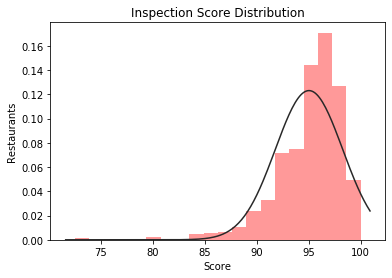

In [11]:
#Plotting inspection score distribution

f1 = sns.distplot(df_merged['score'], fit = norm, kde=False, bins = 20, color = 'r');
f1.set_title('Inspection Score Distribution')
f1.set_ylabel("Restaurants")
f1.set_xlabel("Score")
f1 = plt.gcf()

There are some outliers easily visible, which we do have to take note of. These outliers should have hgher critical violations if my hypothesis were to be true.  

In [12]:
df_merged.loc[df_merged['score']<= 80]

,hsisid,date,score,num_critical,category,critical
18076,4092014186,2016-03-15T00:00:00Z,80.0,16,Food Temperature Control,Yes
18077,4092014186,2016-03-15T00:00:00Z,80.0,16,Food Temperature Control,Yes
18078,4092014186,2016-03-15T00:00:00Z,80.0,16,Physical Facilities,No
18079,4092014186,2016-03-15T00:00:00Z,80.0,16,Physical Facilities,No
18080,4092014186,2016-03-15T00:00:00Z,80.0,16,Food Temperature Control,Yes
...,...,...,...,...,...,...
138402,4092017135,2016-10-26T00:00:00Z,80.0,10,Protection from Contamination,Yes
138403,4092017135,2016-10-26T00:00:00Z,80.0,10,Protection from Contamination,Yes
138404,4092017135,2016-10-26T00:00:00Z,80.0,10,Utensils and Equipment,No
138405,4092017135,2016-10-26T00:00:00Z,80.0,10,Utensils and Equipment,No


In the following graph, I wanted to show the distribution of the amount of critical violations restaurants received during their health inspections. We can tell from this graph, that restaurants in North Carolina thrive for ultimate cleanliness, as the majority receive small amounts of violations. 

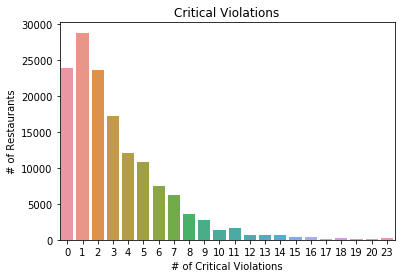

In [13]:
#Plotting critical violations

f2 = sns.countplot(x = 'num_critical', data = df_merged)

f2.set_title('Critical Violations')
f2.set_xlabel('# of Critical Violations')
f2.set_ylabel('# of Restaurants')
f2 = plt.gcf()

In order to fully be able to analyze my question asked earlier, it would be very beneficial to combine the amount of critical violations and the health inspection scores into a graph that will show the relationship between the two variables. This has been done below. 

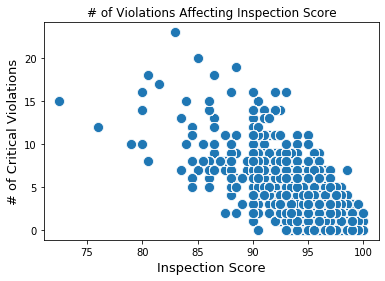

In [14]:
f3 = sns.scatterplot(x = 'score', y = 'num_critical', data = df_merged, s = 100)

f3.set_title('# of Violations Affecting Inspection Score')
f3.set_xlabel("Inspection Score", fontsize = 13)
f3.set_ylabel("# of Critical Violations", fontsize = 13)

f3 = plt.gcf()

# Data Analysis & Results

We can see a relatiosnhip when looking at the scatter plot above. As the inspection score increases, the number of critical violations definitely decreases. In order to further check this we're going to check for a significant relationship, then we can check for linear regression between these two variables.

In [15]:
scores = df_merged['score'].values
violations = df_merged['num_critical'].values

st_score, p_score = normaltest(scores)
st_violation, p_violation = normaltest(violations)

In [16]:
violations = df_merged['num_critical'].values

t_val, p_val = ttest_ind(scores, violations)

if p_val <0.01:
    print('There is a significant difference')
else: 
    print('There is not a significant difference')

There is a significant difference


Since the p-value was less than the alpha value, we do have a significant relationship between the health inspection scores and critical violations. Because of this confirmation, I was able to create OLS regression results to observe the relationship further.

In [17]:
outcome, predictors = patsy.dmatrices('score ~ num_critical', df_merged)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.793e+05
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:04:57   Log-Likelihood:            -3.1420e+05
No. Observations:              143486   AIC:                         6.284e+05
Df Residuals:                  143484   BIC:                         6.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.4302      0.008   1.21e+04   

Here we can clearly see that when a business's violation point value increase, their health inspection score is expected to decrease by .749 with a standard error of .002.
This shows that there is indeed a relationship between the health inspection score received and the number of critical violations. 

# Ethics & Privacy

Food facility inspection reports are considered public information. Due to the fact that the data is publicly available, I have permission to use/analyze it. By using publicly available information, I will not be violating individual privacy through the use of this data. Although this information is public, I have removed a lot of their personal information including, phone numbers, addresses, names, and more during the cleaning process, in order to maintain privacy. 

Since not all restaurants or food related businesses wihtin all of North Carolina state are included in the data sets, there could be certain sampling biases which would not be the most accurate representation of North Carolina grading processes. There are other potential biases to take into consideration as well, for example, the inspectors providing the health inspection score can vary greatly. Some may be less/more lenient than others which can heavily alter a score that the businesses receive.

This research question and the data that could accompany it could impact restaurant’s negatively as it may give inaccurate impressions of the restaurants. Although this may be unavoidable, given the nature of the research question, notes/information can be added to the research so that this is made aware and that the research may be skewed.


# Conclusion & Discussion

I decided to focus on the correlation between a health inspection score received and the number of critical violations that were found during this inspection. I initially wanted to focus on the potential relationship between health inspection scores and foodborne illnesses, because I was curious to see if one does affect the other like you might assume. Because I was limited to the data we were provided (I attempted finding data on my own but it was more difficult than I had anticipated) I had to change my research question and hypothesis to fit what was available to me. I realized that whatever my findings would be on the relationship between health inspection scores and critical violations, could be similar to the original questions I wanted to persue. I could continue this project in the future and find better data that fits that question and compare findings from this project to those. 

I did find a relationship between the two variables, in that health inspection scores are expected to decrease if the business receives a higher amount of critical violations. I was able to come to this conclusion after cleaning and merging data sets and eventually the use of a t-test, followed by taking a look at linear regression data. The visualizations I created were helpful to visually provide some of the data, but when I looked at the scatter plot I created, it didn't suggest a very strong relationship as there were some outliers. I was able to notice a slight relationship here, but needed to confirm it which I did subsequently.

I was able to prove my hypothesis which stated that food related businesses in North Carolina who received a higher number of critical violations receive a lower health inspection score, and vice versa.

Additionaly I wanted to include some limitations I found during the entirety of this project. At first I didn't have all the data I wanted to research the questions I asked. I also omitted certain variables which were part of the original data sets, which could mean that my analysis isn't as in depth. There were probably also other factors that could have affected health inspection score, not just critical violations. Laslty, the conclusions drawn can only be mentioned in regards to the cities listed on the data sets, not the entirety of the state of North Carolina. 

It is important to study the relationships between variables in the world of health inspections. These health inspections are what help food related businesses learn and keep their customers happy and safe from foodborne illnesses.